In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format ='{:,.3f}'.format

In [ ]:
"""
БАЗОВЫЕ ПАРАМЕТРЫ
"""

In [157]:
# дистанции между городами Мосва, Белгород и Новокузнецк, при перелете самолетом (НЕ НАПРЯМУЮ)
aaq_svo = 1231
aaq_ego = 832.5
aaq_noz = 3372.5

# расход топлива за 1 час полета, самолетами Sukhoi Superjet-100 и Boeing 737-300 (кг/ч)
sukh_ssj100 = 1700
boei_737_300 = 2600

# цены на топливо в городах по месяцам (взято в офф. источников)
# https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/
anapa_2016_12 = 38.867
anapa_2017_01 = 41.435
anapa_2017_02 = 39.553

moskva_2016_12 = 36.853
moskva_2017_01 = 36.853
moskva_2017_02 = 36.853

novok_2016_12 = 36.000
novok_2017_01 = 36.000
novok_2017_02 = 36.000

belg_2016_12 = 36.864
belg_2017_01 = 36.864
belg_2017_02 = 36.864

In [ ]:
"""
ФУНКЦИИ
"""

In [225]:
# ф-ция для установки расхода топлива для определенных моделей самолетов В 1 МИНУТУ
def set_rashod_topliva(x):  
    if (x.model == 'Sukhoi Superjet-100'):
        return (sukh_ssj100 / 60)
    elif (x.model == 'Boeing 737-300'):
        return (boei_737_300 / 60)
    else:
        return (-1)
    
# ф-ция для установки дистанций между городами
def set_distance(x):
    if (x.departure_airport == 'SVO' or x.arrival_airport == 'SVO'):
        return aaq_svo
    elif (x.departure_airport == 'EGO' or x.arrival_airport == 'EGO'):
        return aaq_ego
    elif (x.departure_airport == 'NOZ' or x.arrival_airport == 'NOZ'):
        return aaq_noz
    else:
        return (-1)
    
# ф-ция для установки цены топлива
def set_fuel_price(x):
    if (x.actual_departure >= dt.datetime(2016, 12, 1) and x.actual_departure <= dt.datetime(2016, 12, 31, 23, 59)):
        if (x.departure_airport == 'AAQ'):
            return anapa_2016_12
        elif (x.departure_airport == 'SVO'):
            return moskva_2016_12
        elif (x.departure_airport == 'NOZ'):
            return novok_2016_12
        elif (x.departure_airport == 'EGO'):
            return belg_2016_12
        else:
            return (-1)
    if (x.actual_departure >= dt.datetime(2017, 1, 1) and x.actual_departure <= dt.datetime(2017, 1, 31, 23, 59)):
        if (x.departure_airport == 'AAQ'):
            return anapa_2017_01
        elif (x.departure_airport == 'SVO'):
            return moskva_2017_01
        elif (x.departure_airport == 'NOZ'):
            return novok_2017_01
        elif (x.departure_airport == 'EGO'):
            return belg_2017_01
        else:
            return (-1)
    if (x.actual_departure >= dt.datetime(2017, 2, 1) and x.actual_departure <= dt.datetime(2017, 2, 28, 23,59)):
        if (x.departure_airport == 'AAQ'):
            return anapa_2017_02
        elif (x.departure_airport == 'SVO'):
            return moskva_2017_02
        elif (x.departure_airport == 'NOZ'):
            return novok_2017_02
        elif (x.departure_airport == 'EGO'):
            return belg_2017_02
        else:
            return (-1)

In [288]:
intervals = []
intervals.append({'min': dt.datetime(2016, 12, 1), 'max':dt.datetime(2016, 12, 31, 23, 59)})
intervals.append({'min': dt.datetime(2017, 1, 1), 'max':dt.datetime(2017, 1, 31, 23, 59)})
intervals.append({'min': dt.datetime(2017, 2, 1), 'max':dt.datetime(2017, 2, 28, 23, 59)})

In [ ]:
"""
ЧТЕНИЕ ДАННЫХ
"""

In [359]:
data = pd.read_csv('./query_result_2021-03-30T00_09_07.123842Z.csv')
data.head(5)

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,...,to_city,total_economy_seats,sold_economy_seats,sum_ticket_economy,total_business_seats,sold_business_seats,sum_ticket_business,total_comfort_seats,sold_comfort_seats,sum_ticket_comfort
0,136698,PG0480,2016-12-01T09:25:00Z,2016-12-01T10:15:00Z,AAQ,EGO,Arrived,SU9,2016-12-01T09:30:00Z,2016-12-01T10:19:00Z,...,Belgorod,85,82,"519,600.000",12,12,"226,800.000",0,0,nan
1,202931,PG0481,2016-12-01T10:00:00Z,2016-12-01T10:50:00Z,EGO,AAQ,Arrived,SU9,2016-12-01T10:06:00Z,2016-12-01T10:55:00Z,...,Anapa,85,81,"513,300.000",12,12,"226,800.000",0,0,nan
2,136187,PG0252,2016-12-01T10:05:00Z,2016-12-01T11:45:00Z,AAQ,SVO,Arrived,733,2016-12-01T10:09:00Z,2016-12-01T11:49:00Z,...,Moscow,118,117,"1,434,600.000",12,12,"439,200.000",0,0,nan
3,41385,PG0251,2016-12-01T15:05:00Z,2016-12-01T16:45:00Z,SVO,AAQ,Arrived,733,2016-12-01T15:06:00Z,2016-12-01T16:45:00Z,...,Anapa,118,100,"1,226,000.000",12,11,"402,600.000",0,0,nan
4,136774,PG0480,2016-12-02T09:25:00Z,2016-12-02T10:15:00Z,AAQ,EGO,Arrived,SU9,2016-12-02T09:27:00Z,2016-12-02T10:17:00Z,...,Belgorod,85,81,"513,300.000",12,12,"226,800.000",0,0,nan


In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             360 non-null    int64  
 1   flight_no             360 non-null    object 
 2   scheduled_departure   360 non-null    object 
 3   scheduled_arrival     360 non-null    object 
 4   departure_airport     360 non-null    object 
 5   arrival_airport       360 non-null    object 
 6   status                360 non-null    object 
 7   aircraft_code         360 non-null    object 
 8   actual_departure      360 non-null    object 
 9   actual_arrival        360 non-null    object 
 10  model                 360 non-null    object 
 11  from_city             360 non-null    object 
 12  to_city               360 non-null    object 
 13  total_economy_seats   360 non-null    int64  
 14  sold_economy_seats    360 non-null    int64  
 15  sum_ticket_economy    3

In [ ]:
"""
ПРЕДОБРАБОТКА ДАННЫХ
"""

In [360]:
# переведем все даты в правильный фотмат дат
data['scheduled_departure'] = pd.to_datetime(data['scheduled_departure'], format="%Y-%m-%dT%H:%M:%SZ")
data['scheduled_arrival'] = pd.to_datetime(data['scheduled_arrival'], format="%Y-%m-%dT%H:%M:%SZ")
data['actual_departure'] = pd.to_datetime(data['actual_departure'], format="%Y-%m-%dT%H:%M:%SZ")
data['actual_arrival'] = pd.to_datetime(data['actual_arrival'], format="%Y-%m-%dT%H:%M:%SZ")

# заполним некоторые поля нулями, вместо NaN
data.sold_business_seats = data.sold_business_seats.fillna(0)
data.sum_ticket_business = data.sum_ticket_business.fillna(0)


# добавим некоторые новые данные
# расход топлива определенными моделями самолетов за 1 час полета
data['rashod_topliva_v_minutu'] = 0
data.rashod_topliva_v_minutu = data.apply(lambda row: set_rashod_topliva(row), axis=1)
# установка дистанций между городами
data['distance'] = 0
data.distance = data.apply(lambda row: set_distance(row), axis=1)
# вычислим время перелетов (реальное и рассчетное)
data['actual_flight_time'] = data.actual_arrival - data.actual_departure
data.actual_flight_time = data.actual_flight_time / np.timedelta64(60, 's')
data['scheduled_flight_time'] = data.scheduled_arrival - data.scheduled_departure
data.scheduled_flight_time = data.scheduled_flight_time / np.timedelta64(60, 's')
# дополним колонкой с днем недели
data['day_of_week'] = data.actual_arrival.dt.dayofweek

# установка цены на топливо, в зависимочти от месяца и аэропорта
data['fuel_price'] = 0
data.fuel_price = data.apply(lambda row: set_fuel_price(row), axis=1)
# вычисление цены полета по расходу топлива
data['fuel_flight_price'] = data.rashod_topliva_v_minutu * data.actual_flight_time * data.fuel_price
# вычисление рельного дохода от продажи билетов
data['actual_income'] = 0
data.actual_income = data.sum_ticket_economy + data.sum_ticket_business
# вычислениеи разницы между доходом и тратой на топливо
data['profit'] = data.actual_income - data.fuel_flight_price
# вычисление уровня профита, исходя из общего профита на 1 км пути
data['profit_range'] = data.profit / data.distance
# выисление заполненности самолета
data['fullness'] = (data.sold_economy_seats + data.sold_business_seats) / (data.total_economy_seats + data.total_business_seats)



# удлаим лишние/задублированные/пустые колонки
data = data.drop(["departure_airport", "arrival_airport", "status", "aircraft_code", \
                  "total_comfort_seats", "sold_comfort_seats", "sum_ticket_comfort", \
                  "scheduled_departure", "scheduled_arrival", "actual_arrival"], axis = 1)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   flight_id                360 non-null    int64         
 1   flight_no                360 non-null    object        
 2   actual_departure         360 non-null    datetime64[ns]
 3   model                    360 non-null    object        
 4   from_city                360 non-null    object        
 5   to_city                  360 non-null    object        
 6   total_economy_seats      360 non-null    int64         
 7   sold_economy_seats       360 non-null    int64         
 8   sum_ticket_economy       360 non-null    float64       
 9   total_business_seats     360 non-null    int64         
 10  sold_business_seats      360 non-null    int64         
 11  sum_ticket_business      360 non-null    float64       
 12  rashod_topliva_v_minutu  360 non-nul

In [361]:
data.head(10)

,flight_id,flight_no,actual_departure,model,from_city,to_city,total_economy_seats,sold_economy_seats,sum_ticket_economy,total_business_seats,...,distance,actual_flight_time,scheduled_flight_time,day_of_week,fuel_price,fuel_flight_price,actual_income,profit,profit_range,fullness
0,136698,PG0480,2016-12-01 09:30:00,Sukhoi Superjet-100,Anapa,Belgorod,85,82,"519,600.000",12,...,832.500,49.000,50.000,3,38.867,"53,960.352","746,400.000","692,439.648",831.759,0.969
1,202931,PG0481,2016-12-01 10:06:00,Sukhoi Superjet-100,Belgorod,Anapa,85,81,"513,300.000",12,...,832.500,49.000,50.000,3,36.864,"51,179.520","740,100.000","688,920.480",827.532,0.959
2,136187,PG0252,2016-12-01 10:09:00,Boeing 737-300,Anapa,Moscow,118,117,"1,434,600.000",12,...,"1,231.000",100.000,100.000,3,38.867,"168,423.667","1,873,800.000","1,705,376.333","1,385.359",0.992
3,41385,PG0251,2016-12-01 15:06:00,Boeing 737-300,Moscow,Anapa,118,100,"1,226,000.000",12,...,"1,231.000",99.000,100.000,3,36.853,"158,099.370","1,628,600.000","1,470,500.630","1,194.558",0.854
4,136774,PG0480,2016-12-02 09:27:00,Sukhoi Superjet-100,Anapa,Belgorod,85,81,"513,300.000",12,...,832.500,50.000,50.000,4,38.867,"55,061.583","740,100.000","685,038.417",822.869,0.959
5,202783,PG0481,2016-12-02 10:03:00,Sukhoi Superjet-100,Belgorod,Anapa,85,83,"525,900.000",12,...,832.500,50.000,50.000,4,36.864,"52,224.000","752,700.000","700,476.000",841.413,0.979
6,136474,PG0252,2016-12-02 10:06:00,Boeing 737-300,Anapa,Moscow,118,118,"1,446,800.000",12,...,"1,231.000",98.000,100.000,4,38.867,"165,055.193","1,886,000.000","1,720,944.807","1,398.006",1.000
7,41351,PG0251,2016-12-02 15:07:00,Boeing 737-300,Moscow,Anapa,118,105,"1,288,200.000",12,...,"1,231.000",101.000,100.000,4,36.853,"161,293.297","1,690,800.000","1,529,506.703","1,242.491",0.892
8,136873,PG0480,2016-12-03 09:26:00,Sukhoi Superjet-100,Anapa,Belgorod,85,84,"532,200.000",12,...,832.500,51.000,50.000,5,38.867,"56,162.815","759,000.000","702,837.185",844.249,0.990
9,202854,PG0481,2016-12-03 10:02:00,Sukhoi Superjet-100,Belgorod,Anapa,85,79,"500,700.000",12,...,832.500,50.000,50.000,5,36.864,"52,224.000","708,600.000","656,376.000",788.440,0.928


In [397]:
data.tail(10)

,flight_id,flight_no,actual_departure,model,from_city,to_city,total_economy_seats,sold_economy_seats,sum_ticket_economy,total_business_seats,...,distance,actual_flight_time,scheduled_flight_time,day_of_week,fuel_price,fuel_flight_price,actual_income,profit,profit_range,fullness
350,136351,PG0252,2017-02-26 10:13:00,Boeing 737-300,Anapa,Moscow,118,94,"1,152,800.000",12,...,"1,231.000",100.000,100.000,6,39.553,"171,396.333","1,555,400.000","1,384,003.667","1,124.292",0.808
351,41508,PG0251,2017-02-26 15:07:00,Boeing 737-300,Moscow,Anapa,118,99,"1,213,800.000",12,...,"1,231.000",101.000,100.000,6,36.853,"161,293.297","1,653,000.000","1,491,706.703","1,211.784",0.854
352,136953,PG0480,2017-02-27 09:27:00,Sukhoi Superjet-100,Anapa,Belgorod,85,85,"538,500.000",12,...,832.500,50.000,50.000,0,39.553,"56,033.417","765,300.000","709,266.583",851.972,1.000
353,202551,PG0481,2017-02-27 10:02:00,Sukhoi Superjet-100,Belgorod,Anapa,85,83,"525,900.000",12,...,832.500,51.000,50.000,0,36.864,"53,268.480","752,700.000","699,431.520",840.158,0.979
354,136266,PG0252,2017-02-27 10:08:00,Boeing 737-300,Anapa,Moscow,118,98,"1,200,400.000",12,...,"1,231.000",100.000,100.000,0,39.553,"171,396.333","1,566,400.000","1,395,003.667","1,133.228",0.831
355,41499,PG0251,2017-02-27 15:13:00,Boeing 737-300,Moscow,Anapa,118,106,"1,300,400.000",12,...,"1,231.000",99.000,100.000,0,36.853,"158,099.370","1,703,000.000","1,544,900.630","1,254.996",0.900
356,136844,PG0480,2017-02-28 09:26:00,Sukhoi Superjet-100,Anapa,Belgorod,85,73,"461,700.000",12,...,832.500,50.000,50.000,1,39.553,"56,033.417","575,100.000","519,066.583",623.503,0.814
357,202679,PG0481,2017-02-28 10:02:00,Sukhoi Superjet-100,Belgorod,Anapa,85,81,"513,300.000",12,...,832.500,51.000,50.000,1,36.864,"53,268.480","702,300.000","649,031.520",779.617,0.938
358,136215,PG0252,2017-02-28 10:09:00,Boeing 737-300,Anapa,Moscow,118,103,"1,261,400.000",12,...,"1,231.000",100.000,100.000,1,39.553,"171,396.333","1,664,000.000","1,492,603.667","1,212.513",0.877
359,41493,PG0251,2017-02-28 15:08:00,Boeing 737-300,Moscow,Anapa,118,93,"1,139,400.000",12,...,"1,231.000",101.000,100.000,1,36.853,"161,293.297","1,468,800.000","1,307,506.703","1,062.150",0.785


In [ ]:
# некоторые рассчеты с просмотр статистики

In [343]:
for i in range(len(intervals)):
    a = np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.day_of_week == 6)][(data.from_city == 'Anapa') & (data.to_city == 'Moscow')].fullness.values)
    print (intervals[i]['min'], a)

2016-12-01 00:00:00 0.8326923076923076
2017-01-01 00:00:00 0.8107692307692307
2017-02-01 00:00:00 0.8057692307692308


In [342]:
for i in range(7):
    print (i, "A -> M", np.average(data[data.day_of_week == i][(data.from_city == 'Anapa') & (data.to_city == 'Moscow')].fullness.values))
    print (i, "A -> B", np.average(data[data.day_of_week == i][(data.from_city == 'Anapa') & (data.to_city == 'Belgorod')].fullness.values))

0 A -> M 0.8828402366863907
0 A -> B 0.9159397303727201
1 A -> M 0.889940828402367
1 A -> B 0.9294210943695481
2 A -> M 0.8596153846153847
2 A -> B 0.9828178694158076
3 A -> M 0.8928994082840238
3 A -> B 0.9349722442505948
4 A -> M 0.9136094674556214
4 A -> B 0.9238699444885013
5 A -> M 0.8526627218934912
5 A -> B 0.9254559873116576
6 A -> M 0.8159763313609468
6 A -> B 0.9191118160190327


In [341]:
for i in range(7):
    print (i, "M -> A", np.average(data[data.day_of_week == i][(data.from_city == 'Moscow') & (data.to_city == 'Anapa')].fullness.values))
    print (i, "B -> A", np.average(data[data.day_of_week == i][(data.from_city == 'Belgorod') & (data.to_city == 'Anapa')].fullness.values))

0 M -> A 0.8840236686390534
0 B -> A 0.9524187153053133
1 M -> A 0.883431952662722
1 B -> A 0.9555908009516257
2 M -> A 0.9115384615384617
2 B -> A 0.9553264604810997
3 M -> A 0.8881656804733729
3 B -> A 0.9524187153053133
4 M -> A 0.8905325443786983
4 B -> A 0.9492466296590009
5 M -> A 0.8686390532544379
5 B -> A 0.9635210150674068
6 M -> A 0.9023668639053255
6 B -> A 0.9484536082474228


In [ ]:
for i in range(len(intervals)):
    a = np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.day_of_week == 6)][(data.from_city == 'Anapa') & (data.to_city == 'Moscow')].fullness.values)
    print (intervals[i]['min'], a)

In [ ]:
"""
ГРАФИКИ
"""

In [381]:
# Загруженность самолетов (т.е. показатель кол-ва пассажиров к общему кол-ву пасадочных мест в самолете)
dat = {'Period':['2016-12', '2017-01', '2017-02']}
df = pd.DataFrame(dat)
# print (df)

In [370]:
a = []
b = []
for i in range(len(intervals)):
    a.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Sukhoi Superjet-100')].fullness.values))
    b.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Boeing 737-300')].fullness.values))
print (a)
print (b)
df['avg_fullnes_ssj100'] = a
df['avg_fullnes_b737'] = b

[0.9501163950781512, 0.9423012969737278, 0.9364874815905743]
[0.8818858560794044, 0.8853598014888339, 0.8755494505494507]


In [371]:
df

,Period,avg_fullnes_ssj100,avg_fullnes_b737
0,2016-12,0.950,0.882
1,2017-01,0.942,0.885
2,2017-02,0.936,0.876


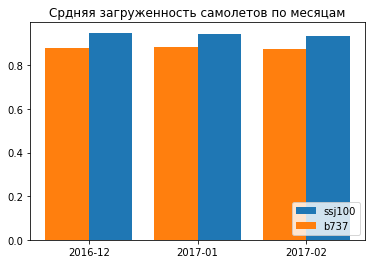

In [380]:
fig, ax = plt.subplots()

ax.bar( df['Period'], df['avg_fullnes_ssj100'], width = 0.4, align = 'edge', label = 'ssj100')
ax.bar( df['Period'], df['avg_fullnes_b737'],width = -0.4, align = 'edge', label = 'b737')
ax.set_title('Средняя загруженность самолетов по месяцам')
ax.legend(loc = 4)

plt.show()

In [385]:
# Средняя чистая прибыль
dat = {'Period':['2016-12', '2017-01', '2017-02']}
df = pd.DataFrame(dat)

In [386]:
a = []
b = []
for i in range(len(intervals)):
    a.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Sukhoi Superjet-100')][['profit']].values))
    b.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Boeing 737-300')][['profit']].values))
print (a)
print (b)
df['avg_profit_ssj100'] = a
df['avg_profit_b737'] = b

[673388.4723118278, 666034.6280913978, 661085.0363690475]
[1496530.3914516126, 1499752.8665053758, 1487884.5442857142]


In [387]:
df

,Period,avg_profit_ssj100,avg_profit_b737
0,2016-12,"673,388.472","1,496,530.391"
1,2017-01,"666,034.628","1,499,752.867"
2,2017-02,"661,085.036","1,487,884.544"


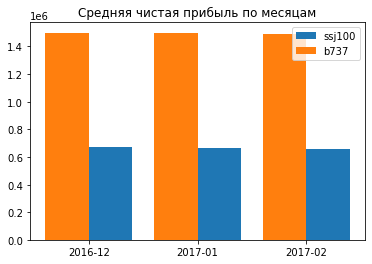

In [391]:
fig, ax = plt.subplots()

ax.bar( df['Period'], df['avg_profit_ssj100'], width = 0.4, align = 'edge', label = 'ssj100')
ax.bar( df['Period'], df['avg_profit_b737'],width = -0.4, align = 'edge', label = 'b737')
ax.set_title('Средняя чистая прибыль по месяцам')
ax.legend(loc = 1)

plt.show()

In [394]:
# Средняя чистая прибыль с полета самолета за 1 км
dat = {'Period':['2016-12', '2017-01', '2017-02']}
df = pd.DataFrame(dat)

In [395]:
a = []
b = []
for i in range(len(intervals)):
    a.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Sukhoi Superjet-100')][['profit_range']].values))
    b.append(np.average(data[(data.actual_departure >= intervals[i]['min']) & \
                        (data.actual_departure <= intervals[i]['max']) & \
                        (data.model =='Boeing 737-300')][['profit_range']].values))
    
print (a)
print (b)
df['avg_profit_range_ssj100'] = a
df['avg_profit_range_b737'] = b

[808.8750418160096, 800.0415953049824, 794.0961397826397]
[1215.702998742171, 1218.3207688914508, 1208.6795648137402]


In [393]:
df

,Period,avg_profit_ssj100,avg_profit_b737
0,2016-12,808.875,"1,215.703"
1,2017-01,800.042,"1,218.321"
2,2017-02,794.096,"1,208.680"


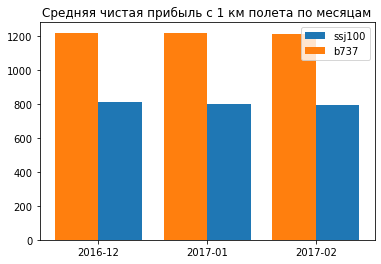

In [396]:
fig, ax = plt.subplots()

ax.bar( df['Period'], df['avg_profit_range_ssj100'], width = 0.4, align = 'edge', label = 'ssj100')
ax.bar( df['Period'], df['avg_profit_range_b737'],width = -0.4, align = 'edge', label = 'b737')
ax.set_title('Средняя чистая прибыль c 1 км полета по месяцам')
ax.legend(loc = 1)

plt.show()